In [1]:
import sys
sys.path.insert(0, '/home/xqiu/proj/slam_seq/velocity_slam_seq/velocitySlamSeq/slam_seq')
sys.path.insert(0, '/home/xqiu/proj/slam_seq/velocity_slam_seq/velocitySlamSeq/plotting')

from dynamo_fitting import *
from phase import *

import scipy
import scipy.stats
import yt
import numpy as np

# Hippocampus data
Here the vlm file is huge (19 G). 
use wget to download the vlm file and then load the pickled data

wget https://www.dropbox.com/s/a9ozcynpxudqdis/raw_data_loom_combined.loom?dl=1

here I just use data I have in my local directory.

Similar, also download the alldata.mat and replace my directory of the mat file with yours

In [2]:
import scipy.io
tmp = scipy.io.loadmat('/home/xqiu/proj/dynamo/data/alldata.mat')
# X, Y, T = tmp['X'], tmp['Y'], tmp['T']
T = tmp['T']
import pickle
vlm = pickle.load(open('/home/xqiu/proj/scPotential/population-diffusions/vlm', 'rb'))
X = vlm.embedding
Y = X + vlm.delta_embedding


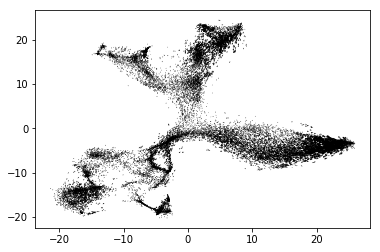

In [3]:
plt.quiver(X[:, 0], X[:, 1], vlm.delta_embedding[:, 0], vlm.delta_embedding[:, 1])

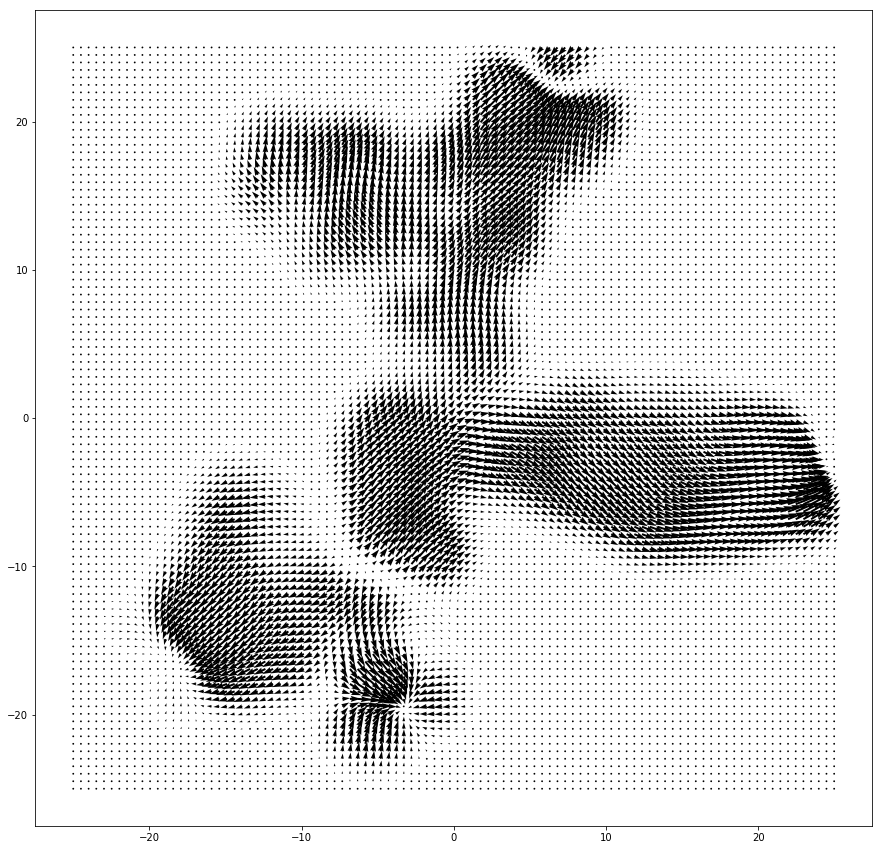

In [4]:
from scVectorField import *
from scPotential import *

VecFld=SparseVFC(X, Y-X, T);

import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
#plt.quiver(X[:, 0], X[:, 1], VecFld['V'][:, 0], VecFld['V'][:, 1])
plt.quiver(T[:, 0], T[:, 1], VecFld['grid_V'][:, 0], VecFld['grid_V'][:, 1])

yt : [INFO     ] 2019-07-09 12:08:49,737 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-09 12:08:49,738 Parameters: domain_dimensions         = [100 100 100]
yt : [INFO     ] 2019-07-09 12:08:49,739 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 12:08:49,740 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 12:08:49,741 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-07-09 12:08:50,134 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:08:50,135 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:08:50,137 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:08:50,137 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:08:50,139 Making a fixed resolution buffer of (('stream', 'velocity_sum')) 800 by 800



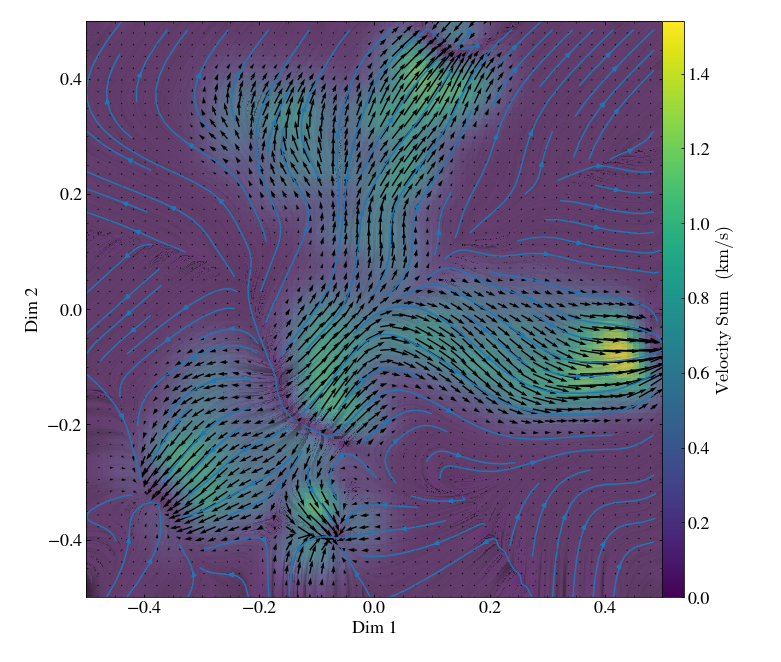

In [5]:
from phase import *
plot_LIC(U_grid = np.reshape(VecFld['grid_V'][:, 0], (100, 100)), V_grid = np.reshape(VecFld['grid_V'][:, 1], (100, 100))) # , file = '/home/xqiu/proj/dynamo/figures/LIC_neuron.pdf'

#plot_LIC(U_grid = np.reshape(VecFld['grid_V'][:, 0], (100, 100)), V_grid = np.reshape(VecFld['grid_V'][:, 1], (100, 100)),  , file = '/home/xqiu/proj/dynamo/figures/LIC_neuron.pdf')


# hgForebrain data

Here the Haber.pickle file is huge (19 G). 
use wget to download the Haber.pickle file and then load the pickled data

wget https://www.dropbox.com/s/a9ozcynpxudqdis/raw_data_loom_combined.loom?dl=1

here I just use data I have in my local directory

Could not find a filed 'Clusters' in vlm.ca.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
yt : [INFO     ] 2019-07-09 12:08:57,818 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-09 12:08:57,819 Parameters: domain_dimensions         = [70 70 70]
yt : [INFO     ] 2019-07-09 12:08:57,820 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 12:08:57,820 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 12:08:57,821 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-07-09 12:08:58,170 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:08:58,171 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:08:58,172 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:08:58,173 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:08:58,174 Making a fixed resolu


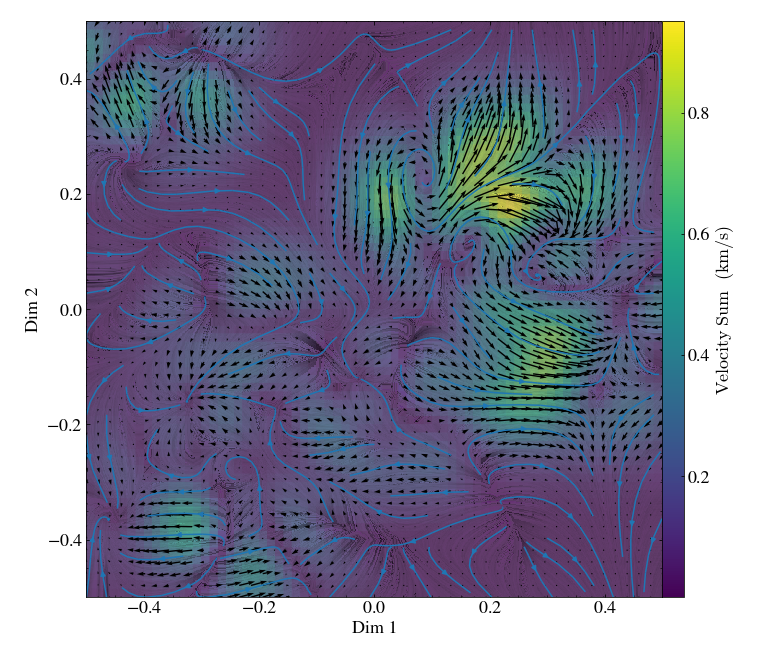

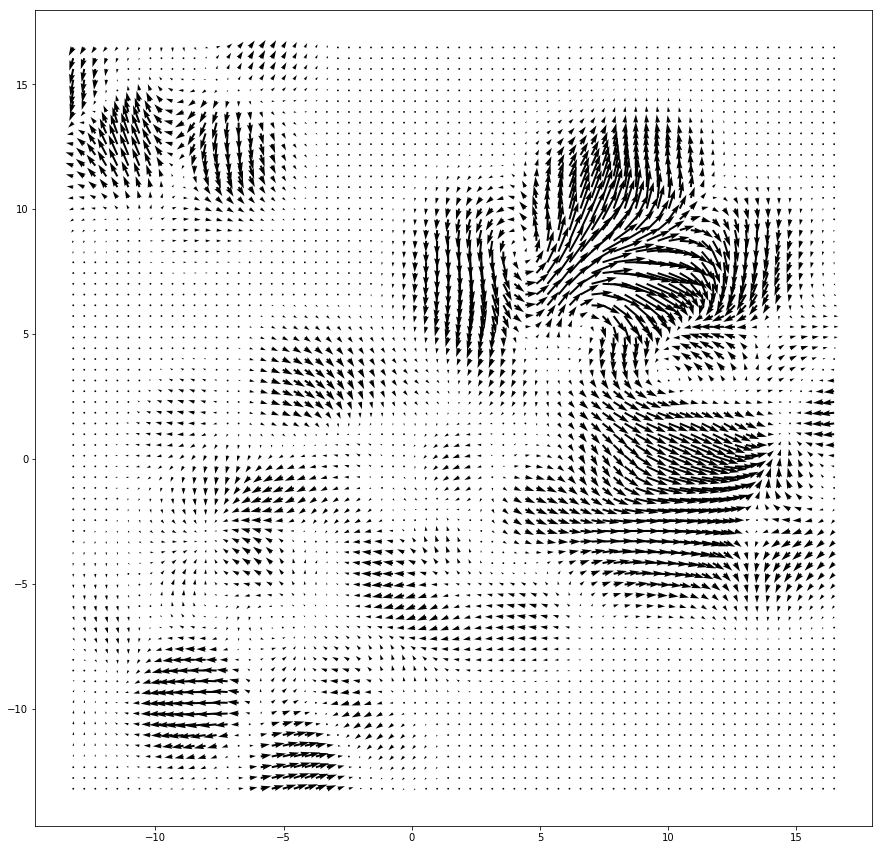

In [6]:
import sys

from gillespie import *
from simulation import *
from velocyto_scvelo import *

import pickle
Haber = pickle.load(open('/home/xqiu/proj/scPotential/velocyto-notebooks/python/Haber.pickle', 'rb'))
Haber_adata = vlm_to_adata(Haber)
Haber_adata.obsm['X_umap'] = Haber.embedding
Haber_adata.obsm['velocity_umap'] = Haber.delta_embedding
louvain = Haber_adata.obs.Maintype
louvain[louvain == 'Endocrine'] = 1
louvain[louvain == 'Enterocyte'] = 2
louvain[louvain == 'Goblet'] = 3
louvain[louvain == 'Paneth'] = 4
louvain[louvain == 'Stem'] = 5
louvain[louvain == 'TA'] = 6
louvain[louvain == 'Tuft'] = 7

Haber_adata.obs.louvain = louvain

# res, trajectories = fate(Haber_adata, show_plot=True, color='r', density = 1, xy_grid_nums=[20, 20])

# res, trajectories = fate(Haber_adata, show_plot=True, color='r', density = 1, xy_grid_nums=[20, 20])

a = Haber.embedding[:, 0].min() - 1
b = Haber.embedding[:, 0].max() + 1


N=70

X, Y = np.meshgrid(np.linspace(a, b, N), np.linspace(a, b, N));
T = np.array((X.flatten(), Y.flatten())).T

from scVectorField import *
# from scPotential import *

VecFld=SparseVFC(Haber.embedding, Haber.delta_embedding, T);

import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
#plt.quiver(X[:, 0], X[:, 1], VecFld['V'][:, 0], VecFld['V'][:, 1])
plt.quiver(T[:, 0], T[:, 1], VecFld['grid_V'][:, 0], VecFld['grid_V'][:, 1])

from phase import *
plot_LIC(U_grid = np.reshape(VecFld['grid_V'][:, 0], (N, N)).T, V_grid = np.reshape(VecFld['grid_V'][:, 1], (N, N)).T)

# hgForebrain data

Here the hgForebrain.pickle file is huge. 
use wget to download the hgForebrain.pickle file and then load the pickled data

wget https://www.dropbox.com/s/a9ozcynpxudqdis/raw_data_loom_combined.loom?dl=1

here I just use data I have in my local directory

yt : [INFO     ] 2019-07-09 12:09:03,472 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-09 12:09:03,473 Parameters: domain_dimensions         = [70 70 70]
yt : [INFO     ] 2019-07-09 12:09:03,473 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 12:09:03,474 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 12:09:03,475 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-07-09 12:09:03,827 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:09:03,828 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:09:03,829 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:09:03,830 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:09:03,831 Making a fixed resolution buffer of (('stream', 'velocity_sum')) 800 by 800



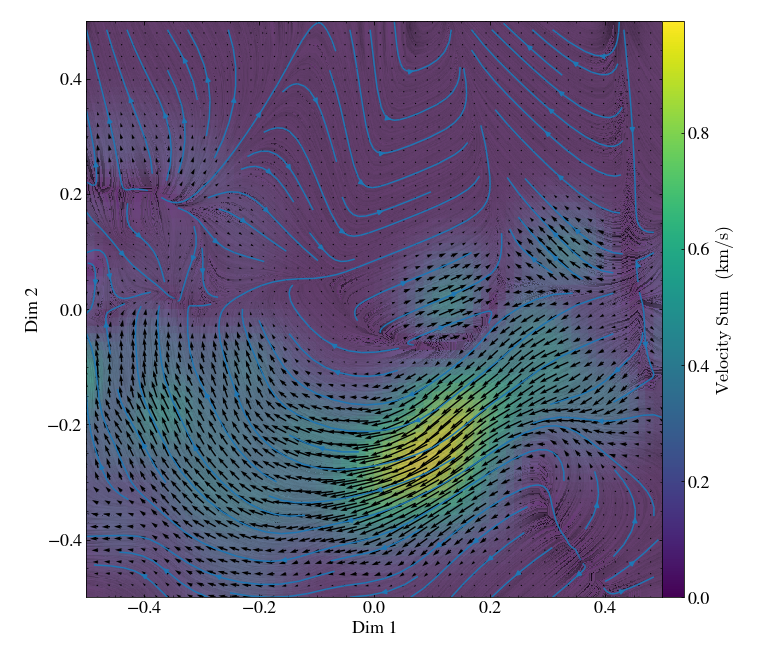

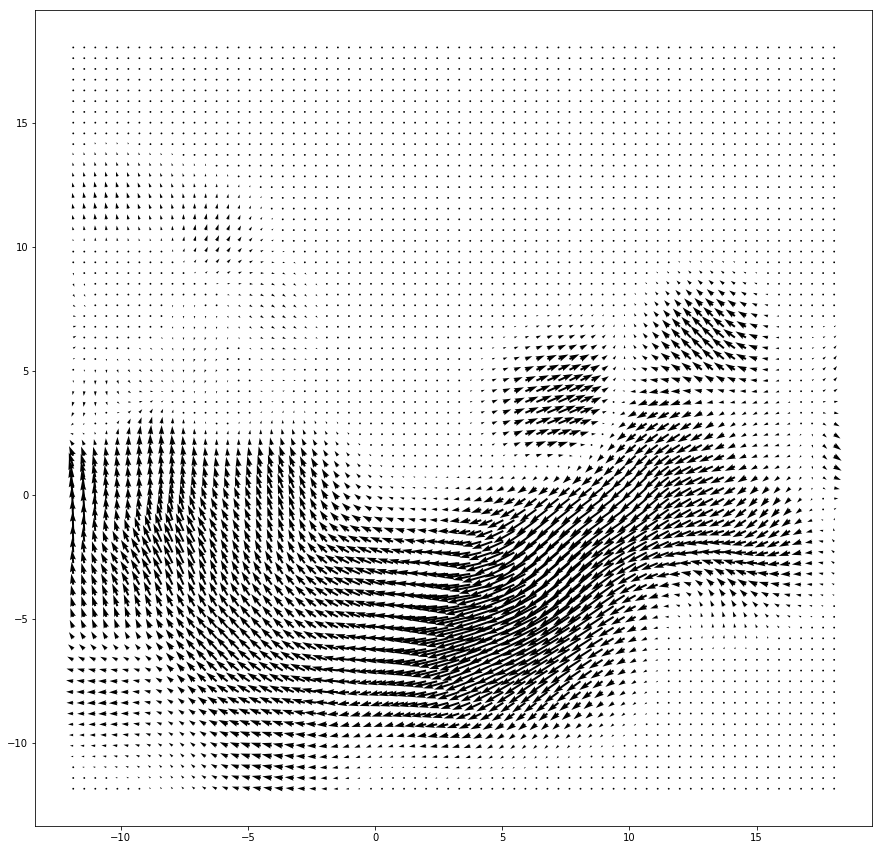

In [7]:
vlm_hgForebrain = pickle.load(open('/home/xqiu/proj/scPotential/velocyto-notebooks/python/hgForebrain.pickle', 'rb'))

hgForebrain_adata = vlm_to_adata(vlm_hgForebrain)
hgForebrain_adata.obsm['X_umap'] = vlm_hgForebrain.embedding
hgForebrain_adata.obsm['velocity_umap'] = vlm_hgForebrain.delta_embedding

# res, trajectories = fate(hgForebrain_adata, show_plot=True, color='r', density = 1, xy_grid_nums=[20, 20])


a = vlm_hgForebrain.embedding[:, 0].min() - 1
b = vlm_hgForebrain.embedding[:, 0].max() + 1

X, Y = np.meshgrid(np.linspace(a, b, N), np.linspace(a, b, N));
T = np.array((X.flatten(), Y.flatten())).T

VecFld=SparseVFC(vlm_hgForebrain.embedding, vlm_hgForebrain.delta_embedding, T);

plt.figure(figsize = (15, 15))
#plt.quiver(X[:, 0], X[:, 1], VecFld['V'][:, 0], VecFld['V'][:, 1])
plt.quiver(T[:, 0], T[:, 1], VecFld['grid_V'][:, 0], VecFld['grid_V'][:, 1])

plot_LIC(U_grid = np.reshape(VecFld['grid_V'][:, 0], (N, N)).T, V_grid = np.reshape(VecFld['grid_V'][:, 1], (N, N)).T)

# Recover vector field on the ODE system from Ying, et. al 2017. 

Download the alldata.mat and replace my directory of the mat file with yours 

In [8]:
sim_data = scipy.io.loadmat('/home/xqiu/proj/dynamo/data/d1.mat')

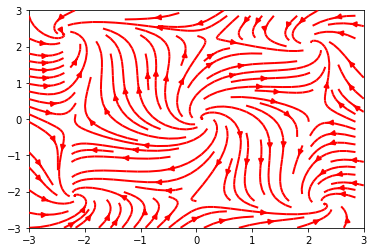

In [9]:
# quiver(sim_data['X'][:, 0], sim_data['X'][:, 1], sim_data['Y'][:, 0], sim_data['Y'][:, 1]); 
plt.streamplot(np.reshape(sim_data['X'][:, 0], (100, 100))[:, 0], 
           np.reshape(sim_data['X'][:, 0], (100, 100))[:, 0], 
           np.reshape(sim_data['Y'][:, 0], (100, 100)).T, 
           np.reshape(sim_data['Y'][:, 1], (100, 100)).T, 
           color='red', zorder=3, linewidth=2)

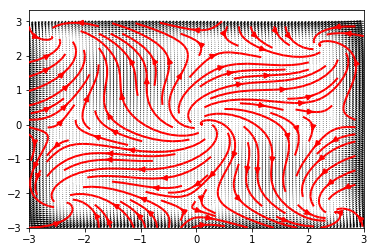

In [10]:
VecFld_sim=SparseVFC(sim_data['X'], sim_data['Y'], sim_data['X'], M=500, beta = 2);

plt.quiver(sim_data['X'][:, 0], sim_data['X'][:, 1], sim_data['Y'][:, 0], sim_data['Y'][:, 1]); 
plt.streamplot(np.reshape(sim_data['X'][:, 0], (100, 100))[:, 0], 
           np.reshape(sim_data['X'][:, 0], (100, 100))[:, 0], 
           np.reshape(VecFld_sim['grid_V'][:, 0], (100, 100)).T, 
           np.reshape(VecFld_sim['grid_V'][:, 1], (100, 100)).T, 
           color='red', zorder=3, linewidth=2)

yt : [INFO     ] 2019-07-09 12:09:17,093 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-09 12:09:17,094 Parameters: domain_dimensions         = [100 100 100]
yt : [INFO     ] 2019-07-09 12:09:17,095 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 12:09:17,096 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 12:09:17,097 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-07-09 12:09:17,462 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:09:17,463 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:09:17,465 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:09:17,465 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:09:17,467 Making a fixed resolution buffer of (('stream', 'velocity_sum')) 800 by 800



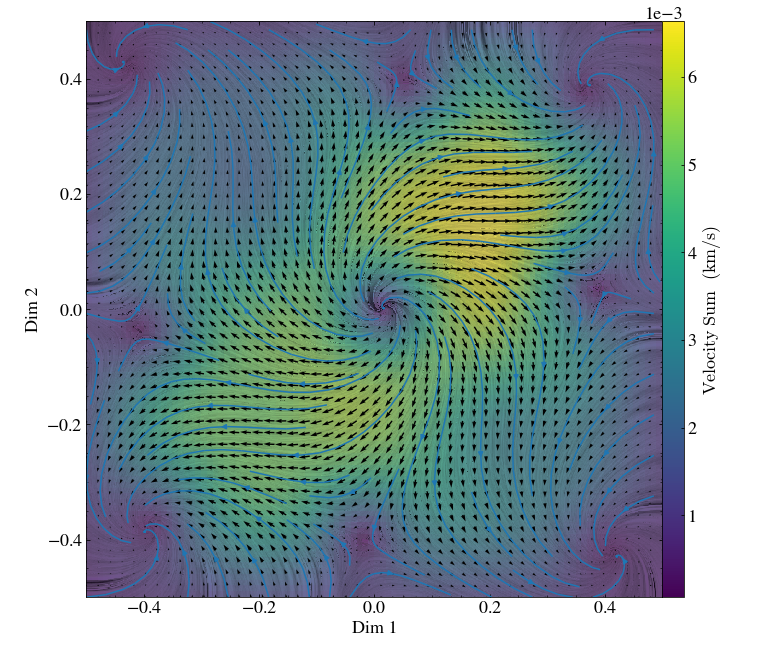

In [11]:
plot_LIC(U_grid = np.reshape(VecFld_sim['grid_V'][:, 0], (100, 100)), V_grid = np.reshape(VecFld_sim['grid_V'][:, 1], (100, 100)))

# curl-free and divergence free vector field from Ma, et. al 2013

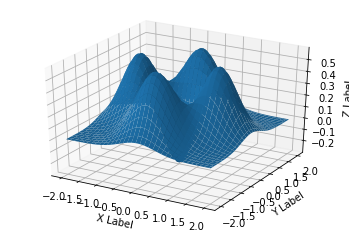

In [12]:
# curl-free and divergence free 
a = -2; b = 2; N = 70;
SIGMA = 0.25*np.eye(2);
mu = np.array([[0, 0], [1, 0], [0, 1], [-1, 0], [0, -1]])
w = [-1, 1, 1, 1, 1]
gma = 0.5;
NumSamp = 500;
CorrRatio = 0.3;

# generate 3D shape
dx = (b-a)/(N-1); dy = dx;
X, Y = np.meshgrid(np.linspace(a, b, N), np.linspace(a, b, N));
T = np.array((X.flatten(), Y.flatten())).T
Z = np.zeros(N);
for ii in range(mu.shape[0]):
    p = w[ii] * scipy.stats.multivariate_normal.pdf(T, mu[ii, :], SIGMA);
    Z = Z + p.reshape((N, N))

# figure, plt.plot_surface(X, Y, Z)
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

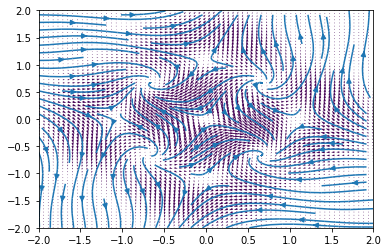

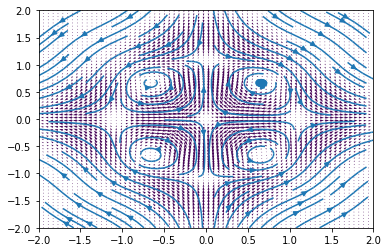

In [13]:
# generate vector field
DX1, DY1 = np.gradient(Z, dx, dy); # curl-free field
DX2 = -DY1; DY2 = DX1; # divergence-free field
DX = -gma*DX1 + (1-gma) * DY1;
DY = -gma*DY1 + (1-gma) * (-DX1);
V = np.array((DX.flatten(), DY.flatten())).T 

# curl-free field
plt.quiver(X, Y, DX, DY, 1) # , colormap hsv, axis equal, axis tight
plt.streamplot(X, Y, DX, DY, 1)
# divergence-free field
plt.figure()
plt.quiver(X, Y, DX2, DY2, 1) # , colormap hsv, axis equal, axis tight
plt.streamplot(X, Y, DX2, DY2, 1)


yt : [INFO     ] 2019-07-09 12:09:22,599 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-09 12:09:22,600 Parameters: domain_dimensions         = [70 70 70]
yt : [INFO     ] 2019-07-09 12:09:22,601 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 12:09:22,601 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 12:09:22,602 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-07-09 12:09:22,962 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:09:22,963 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:09:22,964 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:09:22,965 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:09:22,966 Making a fixed resolution buffer of (('stream', 'velocity_sum')) 800 by 800



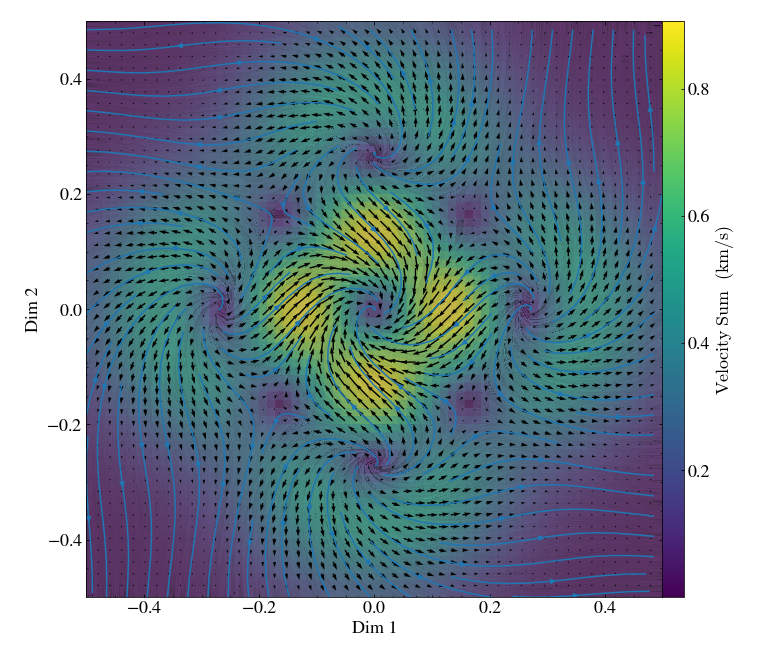

In [14]:
# curl-free field

plot_LIC(U_grid = DX, V_grid = DY)

yt : [INFO     ] 2019-07-09 12:09:25,119 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-09 12:09:25,120 Parameters: domain_dimensions         = [70 70 70]
yt : [INFO     ] 2019-07-09 12:09:25,120 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-09 12:09:25,121 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-09 12:09:25,122 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2019-07-09 12:09:25,487 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:09:25,488 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:09:25,490 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:09:25,491 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-09 12:09:25,492 Making a fixed resolution buffer of (('stream', 'velocity_sum')) 800 by 800



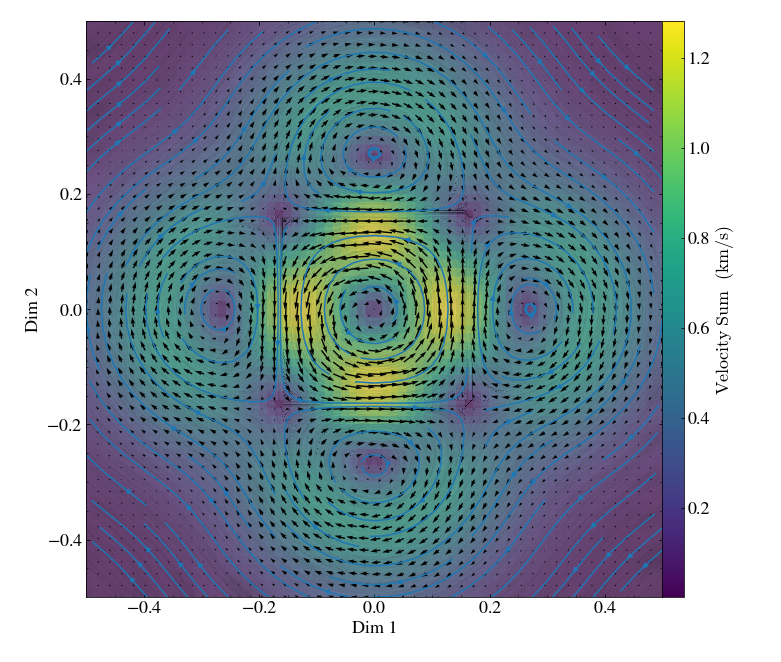

In [15]:
# divergence-free field
plot_LIC(U_grid = DX2, V_grid = DY2)